In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')

In [79]:
#loading the data set
df = pd.read_csv('Data_for_UCI_named.csv')
df.shape

(10000, 14)

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [18]:
#checking the distribution of target variable 

df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [80]:
#more preprocessing 

df = df.drop(columns = 'stab')

x = df.drop(columns='stabf')

y = df['stabf']


In [81]:
#splitting the dataset into train set and test set

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1 )

y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [82]:
#working on imbalance data using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 1)

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [24]:
y_train_balanced.value_counts()

unstable    5092
stable      5092
Name: stabf, dtype: int64

In [83]:
#normalizing the data sets

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train_balanced), columns = x_train_balanced.columns)
normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

### Random Forest 

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf.fit(normalized_x_train, y_train_balanced)

RandomForestClassifier(random_state=1)

In [85]:
#checking the model for overfitting 

rf_test = rf.score(normalized_x_test, y_test)

print('rf_test: {}'.format(round(rf_test*100),2))

rf_train = rf.score(normalized_x_train, y_train_balanced)

print('rf_train: {}'.format(round(rf_train*100),2))
      

rf_test: 92
rf_train: 100


In [86]:
#Calculating Accuracy 

from sklearn.metrics import accuracy_score

new_predictions = rf.predict(normalized_x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)

accuracy

0.918

### Extra Trees Classifier

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(random_state=1)

et.fit(normalized_x_train, y_train_balanced)

ExtraTreesClassifier(random_state=1)

In [41]:
et_test = et.score(normalized_x_test, y_test)

print('et_test:{}'.format(round(et_test*100), 2))

et_train = et.score(normalized_x_train, y_train_balanced)

print('et_train:{}'.format(round(et_train*100), 2))

et_test:92
et_train:100


In [42]:
#Calculating Accuracy 

new_predictions = et.predict(normalized_x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)

accuracy

0.919

### XGBoost

In [87]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1)

xgb.fit(normalized_x_train, y_train_balanced)


[16:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
#checking the model for overfitting 

xgb_test = xgb.score(normalized_x_test, y_test)

print('xgb_test: {}'.format(round(xgb_test*100),2))

xgb_train = xgb.score(normalized_x_train, y_train_balanced)

print('xgb_train: {}'.format(round(xgb_train*100),2))

xgb_test: 94
xgb_train: 100


In [89]:
#Calculating Accuracy 

new_predictions = xgb.predict(normalized_x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)

accuracy


0.9415

### Light GBM

In [90]:
from lightgbm import LGBMClassifier

ltb = LGBMClassifier(random_state=1)

ltb.fit(normalized_x_train, y_train_balanced)

LGBMClassifier(random_state=1)

In [91]:
#checking the model for overfitting 

ltb_test = ltb.score(normalized_x_test, y_test)

print('ltb_test: {}'.format(round(ltb_test*100),2))

ltb_train = ltb.score(normalized_x_train, y_train_balanced)

print('ltb_train: {}'.format(round(ltb_train*100),2))

ltb_test: 94
ltb_train: 100


In [92]:
#Calculating Accuracy 

new_predictions = ltb.predict(normalized_x_test)

accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)

accuracy


0.935

### Hyper Parameter tuning on Extra Trees Classifiers

In [93]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,

'min_samples_leaf': min_samples_leaf,

'min_samples_split': min_samples_split,

'max_features': max_features}

rs = RandomizedSearchCV(ExtraTreesClassifier(random_state = 1),hyperparameter_grid, cv=5, n_iter = 10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)

In [94]:
rs.fit(normalized_x_train, y_train_balanced)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [96]:
rs.best_params_

{'n_estimators': 300,
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

In [97]:
rs.best_score_

0.9491371802402122

In [114]:
# Building the model

extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)

In [115]:
# Training the model

extra_tree_forest.fit(normalized_x_train, y_train_balanced)
  

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

In [116]:
# Computing the importance of each feature

feature_importance = extra_tree_forest.feature_importances_
  

In [117]:
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

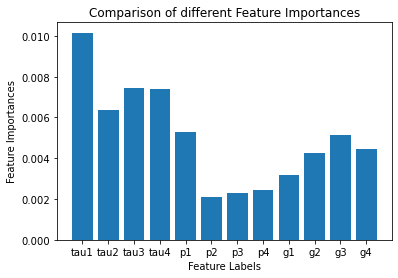

In [113]:
# Plotting a Bar Graph to compare the models
plt.bar(normalized_x_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()